## Tasks
Assigned to Sierra Stevenson, JSIP intern under Dr. Jonathan Jiang and Dr. Longtao Wu<p>
This analysis is intended to compare observed (MLS/AIRS/GPM_MERGIR) and simulated (UM) data to evaluate<br>how convection is resolved by storm-resolving models.

List of Tasks<p>
[DONE]&nbsp;&nbsp;&nbsp;Task 1 — UM moisture at 100 hPa map<br>
[DONE]&nbsp;&nbsp;&nbsp;Task 2 — MLS moisture at 100 hPa map<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 3 — UM/MLS/AIRS vert. profiles pressure vs temp/moisture<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 4 — UM/MLS PDFs (moisture)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 5 — UM/GPM_MERGIR PDFs (brightness temp)

UM (monthly): Task 1,2  <br>
MLS (monthly): Task 1,2 <br>
UM (hourly): Task 3-5   <br>
MLS (hourly): Task 3-5  <br>
AIRS (hourly): 

## Code
Setup

In [1]:
import metpy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.stats as sst
import dask
import os
import glob
import below_god as bg
import seaborn as sns

from metpy.interpolate import log_interpolate_1d
from metpy.units import units
from netCDF4 import MFDataset, Dataset, num2date
from pydap.client import open_url

In [2]:
# Folder containing data
path = "/nas/bigdata_static/longtaow/"

# Conversion factors
hPa_to_Pa = 100
kgkg_to_ppmv = 1.608 * 10 ** 6

UM data

In [3]:
# Read in UM data
UM_data_hus = xr.open_mfdataset(path+'DYAMOND/Monsoon/hus/*.nc', parallel=True)     # Moisture (kg/kg)
UM_data_prs = xr.open_mfdataset(path+'DYAMOND/Monsoon/pfull/*.nc', parallel=True)   # Pressure (Pa)
UM_data_rlut = xr.open_mfdataset(path+'DYAMOND/Monsoon/rlut/*.nc', parallel=True)   # Brightness Temperature (K)
UM_data_ta = xr.open_mfdataset(path+'DYAMOND/Monsoon/ta/*.nc', parallel=True)       # Temperature (C)

In [4]:
# # Average across lat/lon
# UM_avg_prs = UM_data_prs.mean(dim=['latitude','longitude'])     # Pressure
# UM_avg_hus = UM_data_hus.mean(dim=['latitude','longitude'])     # Moisture
# UM_avg_rlut = UM_data_rlut.mean(dim=['latitude','longitude'])   # Brightness Temperature
UM_avg_ta = UM_data_ta.mean(dim=['latitude','longitude'])       # Temperature

# # Model level number start/end indexes enclosing 100 hPa
# lv1, lv2 = 45, 55

# # Isolate pressure data variable
# UM_prs = UM_avg_prs['air_pressure'][:,lv1:lv2]

# # Isolate moisture data and convert units from kg/kg to ppmv
# UM_hus = UM_avg_hus['specific_humidity'][:,lv1:lv2] * kgkg_to_ppmv

In [5]:
# # Convert data xarrays to numpy arrays for interpolation
# UM_prs_arr = np.array(UM_prs)       # Pressure

In [6]:
# # Convert data xarrays to numpy arrays for interpolation
# UM_hus_arr = np.array(UM_hus)       # Moisture

# # Set target pressure (100 hPa)
# target_pressure = 100 * hPa_to_Pa

# # Interpolate
# UM_hus100 = log_interpolate_1d(target_pressure, UM_prs_arr, UM_hus_arr, axis=0)

# # Remove axis of length 1
# UM_hus100 = np.squeeze(UM_hus100)

In [7]:
# Save isobaric moisture data into NumPy file
np.save("UM_hus_100hPa", UM_hus100)

# Get lat and lon for mapping
UM_lat = UM_data_prs['latitude'][:]
UM_lon = UM_data_prs['longitude'][:]

# Isolate brightness temperature data variable
UM_olr = UM_avg_rlut['toa_outgoing_longwave_flux']

# Isolate temperature data variable
UM_ta = UM_avg_ta['air_temperature'][lv1:lv2,:,:]

NameError: name 'UM_hus100' is not defined

MLS data

In [ ]:
# MLS monthly data
MLS_data = xr.open_mfdataset(path+'MLS_monthly/H2O/MLS_H2O*08.nc', concat_dim='time', combine='nested').squeeze().rename({'dim1_H2OAVG':'Pressure','dim3_H2OAVG':'Lat','dim2_H2OAVG':'Lon'})

# Temporal average
MLS_data_avg = MLS_data.mean(dim='time')

# Isolate by data variable
MLS_prs = MLS_data_avg['PRESSURE'].values
MLS_h2o = MLS_data_avg['H2OAVG'] * kgkg_to_ppmv

# Pressure index for 100 hPa
prs_idx = 12

# Isolate MLS moisture data by pressure index (100 hPa) and convert units from kg/kg to ppmv
MLS_h2o100 = MLS_h2o.sel(Pressure=prs_idx).values

# Lat and lon values for plotting
MLS_lat = MLS_data_avg['LAT']
MLS_lon = MLS_data_avg['LON']

In [ ]:
MLS_data.mean(dim=['Lat','dim1_LAT','Lon','dim1_LON']).sel(Pressure=prs_idx).sel(dim1_PRESSURE=prs_idx)

<xarray.Dataset>
Dimensions:   (time: 16)
Dimensions without coordinates: time
Data variables:
    PRESSURE  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LAT       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LON       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    H2OAVG    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:
# Read L2 data using below_god
MLS_test = bg.io.read_l2gp('/data/emls/l2gp/v05.01/2016/225/MLS-Aura_L2GP-H2O_v05-01-c01_2016d225.he5')

In [ ]:
path = "/data/emls/l2gp/v05.01/2016/"
yday_range = np.arange(224,252+1)   # 08/11 - 09/08 (double check)
MLS_hrly_format = "{YDAY}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{YDAY}.he5"
file = "/data/emls/l2gp/v05.01/2016/225/MLS-Aura_L2GP-H2O_v05-01-c01_2016d225.he5"

In [ ]:
# Find min length of hourly data
lim = 4000
for day in yday_range:
    # print(day)
    if len(bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value']) < lim:
        lim = len(bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value'])

print(f"The minimum length of 'profile' values in the MLS L2 hourly datasets is {lim}.")

# Initialize xarray with first day
MLS_hrly = bg.io.read_l2gp('/data/emls/l2gp/v05.01/2016/224/MLS-Aura_L2GP-H2O_v05-01-c01_2016d224.he5')['value'][:lim]

# Fill in rest of hourly datasets
for day in yday_range:
    new = bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value'][:lim]
    MLS_hrly = xr.concat([MLS_hrly, new], dim='day')

The minimum length of 'profile' values in the MLS L2 hourly datasets is 3402.


In [ ]:
# Select pressure = 100 hPa
MLS_h2o100_hrly = MLS_hrly.sel(lev=100.0) * kgkg_to_ppmv
MLS_h2o100_hrly_flat = np.array(MLS_h2o100_hrly).ravel()

AIRS data

In [ ]:
AIRS_file_names = []
AIRS_file1 = '/data/airs/AIRX3STD/v7/2003/AIRS.2003.08.15.L3.RetStd001.v7.0.3.0.G20202222706.hdf'
AIRS_data = xr.open_dataset(xr.backends.NetCDF4DataStore(Dataset(AIRS_file1)))

print("Beginning loop. Runtime: 9 sec per file. (2 min for yearly data; 70 min for daily data.")
for file in glob.glob('/data/airs/AIRX3STD/v7/*/AIRS.*.08.15.L3.RetStd001.v7.0.3.0.*.hdf'):
    print(file)
    AIRS_file_names.append(file)
    AIRS_data = xr.concat([AIRS_data, xr.open_dataset(xr.backends.NetCDF4DataStore(Dataset(file)))], dim="time")

Beginning loop. Runtime: 9 sec per file. (2 min for yearly data; 70 min for daily data.
/data/airs/AIRX3STD/v7/2003/AIRS.2003.08.15.L3.RetStd001.v7.0.3.0.G20202222706.hdf
/data/airs/AIRX3STD/v7/2004/AIRS.2004.08.15.L3.RetStd001.v7.0.3.0.G20195222930.hdf
/data/airs/AIRX3STD/v7/2005/AIRS.2005.08.15.L3.RetStd001.v7.0.3.0.G20194175526.hdf
/data/airs/AIRX3STD/v7/2006/AIRS.2006.08.15.L3.RetStd001.v7.0.3.0.G20193130345.hdf
/data/airs/AIRX3STD/v7/2007/AIRS.2007.08.15.L3.RetStd001.v7.0.3.0.G20192120413.hdf
/data/airs/AIRX3STD/v7/2008/AIRS.2008.08.15.L3.RetStd001.v7.0.3.0.G20191235723.hdf
/data/airs/AIRX3STD/v7/2009/AIRS.2009.08.15.L3.RetStd001.v7.0.3.0.G20191120349.hdf
/data/airs/AIRX3STD/v7/2010/AIRS.2010.08.15.L3.RetStd001.v7.0.3.0.G20185230916.hdf
/data/airs/AIRX3STD/v7/2011/AIRS.2011.08.15.L3.RetStd001.v7.0.3.0.G20184153420.hdf
/data/airs/AIRX3STD/v7/2012/AIRS.2012.08.15.L3.RetStd001.v7.0.3.0.G20183101552.hdf
/data/airs/AIRX3STD/v7/2013/AIRS.2013.08.15.L3.RetStd001.v7.0.3.0.G20181235357.hdf

In [ ]:
AIRS_data = AIRS_data.mean(dim='time')

# Average ascending/descending temperature
AIRS_t_A = AIRS_data['Temperature_A'].mean(dim=['YDim:ascending', 'XDim:ascending', ])                              # Ascending orbit temperature
AIRS_t_D = AIRS_data['Temperature_D'].mean(dim=['YDim:descending', 'XDim:descending'])                              # Descending orbit temperature
AIRS_t = (AIRS_t_A.values + AIRS_t_D.values) / 2                                                                    # Average temperature
AIRS_t_prs = (AIRS_t_A['StdPressureLev:ascending'].values + AIRS_t_D['StdPressureLev:descending'].values) / 2       # Temperature-associated pressure

# Average ascending/descending moisture
AIRS_h2o_A = AIRS_data['H2O_MMR_A'].mean(dim=['YDim:ascending', 'XDim:ascending'])                                  # Ascending orbit moisture
AIRS_h2o_D = AIRS_data['H2O_MMR_D'].mean(dim=['YDim:descending', 'XDim:descending'])                                # Descending orbit moisture
AIRS_h2o = ((AIRS_h2o_A.values + AIRS_h2o_D.values) / 2) * kgkg_to_ppmv                                             # Average moisture
AIRS_h2o_prs = (AIRS_h2o_A['H2OPressureLev:ascending'].values + AIRS_h2o_D['H2OPressureLev:descending'].values) / 2 # Moisture-associated pressure
AIRS_h2o_prs = AIRS_h2o_prs

AIRS/MLS: Pressure vs. moisture/temperature

In [ ]:
# Find MLS data where pressure < 300 hPa
MLS_prs_idxs_under300 = np.where(MLS_prs * hPa_to_Pa <= (300 + 50), np.arange(len(MLS_prs)), np.nan)       # Get list of indexes where MLS pressure < 300 hPa
MLS_prs_idxs_under300 = MLS_prs_idxs_under300[~np.isnan(MLS_prs_idxs_under300)].astype(int)                # Remove NaNs and convert values to integers in list
MLS_h2o_under300 = MLS_h2o.mean(dim=['Lat','Lon'])[MLS_prs_idxs_under300]                                  # Get corresponding moisture values

# Find AIRS data where pressure >= 300 hPa
AIRS_prs_idxs_over300 = np.where(AIRS_h2o_prs >= 300, np.arange(len(AIRS_h2o_prs)), np.nan)               # Get list of indexes where AIRS pressure >= 300 hPa
AIRS_prs_idxs_over300 = AIRS_prs_idxs_over300[~np.isnan(AIRS_prs_idxs_over300)].astype(int)             # Remove NaNs and convert values to integers in list
AIRS_h2o_over300 = AIRS_h2o[AIRS_prs_idxs_over300]   

## Figures

Labels for plotting

In [ ]:
# All
date_range = "08/11/2016 — 09/08/2016"

# UM
UM_name = "Unified Model"

# MLS
MLS_dates = "08/2004 — 08/2022"
MLS_name = "MLS"

# GPM_MERGIR
GPM_name = "GPM_MERGIR Data"

Functions for figure creation

In [ ]:
# Geographic map
def CreateMap(moisture_arr=MLS_h2o100, lat=MLS_lat, lon=MLS_lon, arr_title=MLS_name, date_range=date_range, prs_hPa="100"):
    # Set up our projection
    crs = ccrs.PlateCarree()

    # Create the figure and grid for subplots
    fig = plt.figure(figsize=(16, 8))

    # Plot 100 hPa
    ax = plt.subplot(111, projection=crs)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.set_extent([-179.99999,180,-10,50])  # TODO: Look at this

    # Contour moisture
    cf = ax.contourf(lon, lat, moisture_arr, cmap=plt.cm.RdBu, levels=100,
                    transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.75, pad=0.05,
                    extendrect='True')
    cb.set_label('ppmv', size='large')
    cf.set_clim(4,10)   # Play with this

    # Make the axis title
    ax.set_title(f"{arr_title}: Moisture (ppmv) at {prs_hPa} hPa averaged for {date_range}", loc='center', fontsize=14, pad=8)
    plt.show()

def CreateVertProfile(arr, arr_prs, arr2=0, arr2_prs=None, data_label="Moisture", source="AIRS", source2="MLS", date_range=date_range, custom_units=None, full_AIRS=False):
    if data_label == "Moisture":
        units = "ppmv"
    elif data_label == "Temperature":
        units = "°C"
    else:
        units = custom_units
    plt.title(f"Vertical Profiles of Pressure (hPa) vs. {data_label} ({units})\nfrom {source} Data for {date_range}")
    plt.ylabel("Pressure (Pa)")
    plt.xlabel(f"{data_label} ({units})")
    plt.gca().invert_yaxis()

    plt.plot(arr, arr_prs, label=source, color="darkblue")

    if np.array(arr2).any() == True:
        plt.plot(arr2, arr2_prs, label=source2, color="orange")
        plt.legend()
    if full_AIRS == True:
        plt.plot(AIRS_h2o, AIRS_h2o_prs, label="AIRS (full)", zorder=-1, alpha=1, linewidth=2, linestyle="--", color="darkblue")
    plt.show()

# Plot PDFs
def CreatePDF(arr, data_label="Moisture", source=MLS_name, date_range=date_range, custom_units=None, prs_hPa="100"):
    # Plot title
    plt.title(f"PDF of {source} {data_label} Data at {prs_hPa} hPa\nfor {date_range}")
    if data_label == "Moisture":
        units = "ppmv"
    elif data_label == "Brightness Temperature":
        units = "K"
    else:
        units = custom_units

    # x and y labels
    plt.xlabel(data_label + f" ({units})")
    plt.ylabel("Density")

    # Plot PDF
    sns.kdeplot(arr)
    plt.show()

Task 1 and 2: UM, MLS moisture at 100 hPa

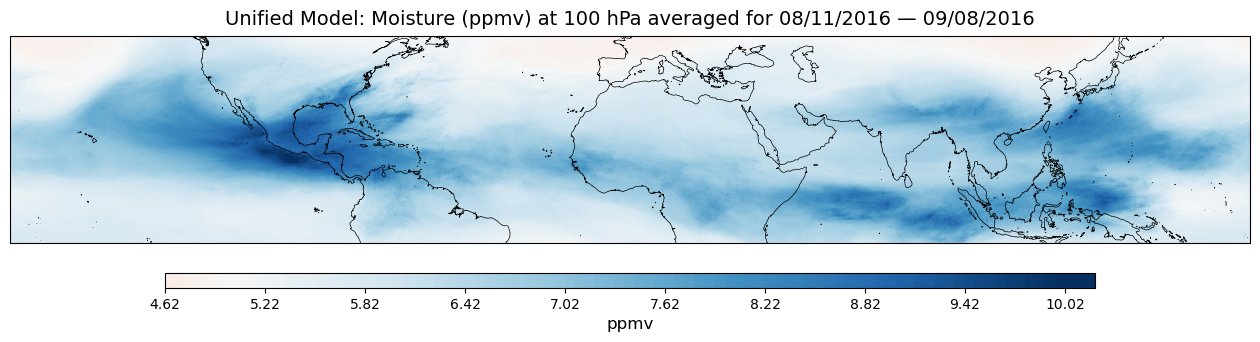

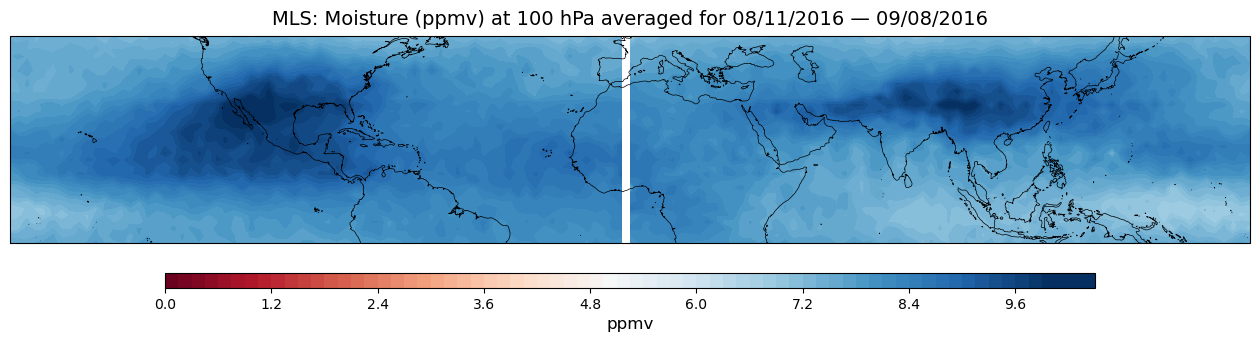

In [ ]:
# Moisture at 100 hPa (UM)
CreateMap(UM_hus100,  UM_lat,  UM_lon,  UM_name, date_range, 100)

# Moisture at 100 hPa (MLS)
CreateMap(MLS_h2o100)

# Mean moisture values
# print("Mean value\nUM:", np.mean(UM_hus100),"\nMLS:", np.mean(MLS_h2o100))

Task 3: Vertical profiles of pressure vs. temperature/moisture (UM, MLS)

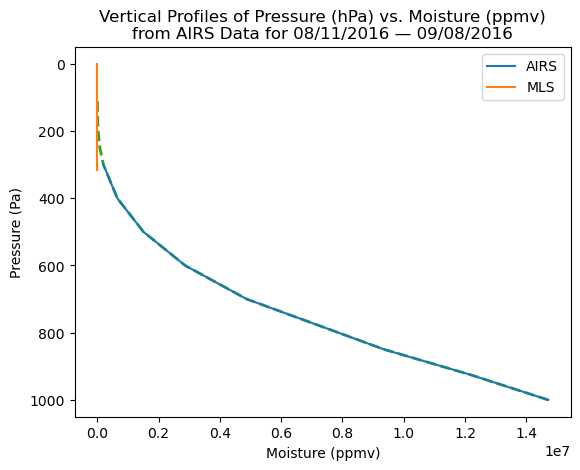

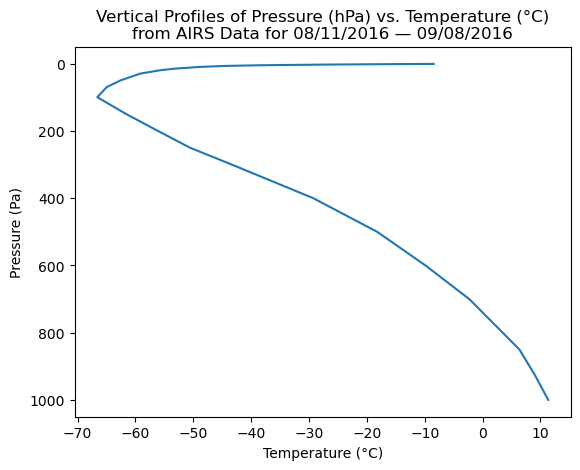

In [ ]:
# Pressure vs. Moisture (MLS/AIRS)
CreateVertProfile(AIRS_h2o_over300, AIRS_h2o_prs[AIRS_prs_idxs_over300], MLS_h2o_under300, MLS_prs[MLS_prs_idxs_under300] * hPa_to_Pa, full_AIRS=True)

# Pressure vs. Temperature  (AIRS)
CreateVertProfile(AIRS_t-273.15, AIRS_t_prs, data_label="Temperature")

KeyboardInterrupt: 

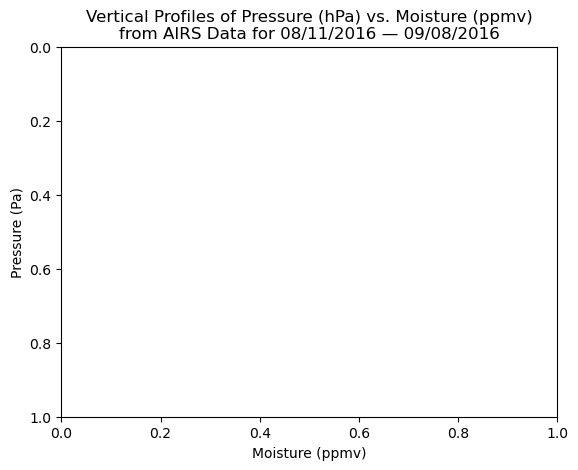

In [ ]:
# Pressure vs. Moisture (UM)
CreateVertProfile(UM_hus, UM_prs)

# Pressure vs. Temperature  (UM)
# CreateVertProfile(UM_ta-273.15, UM_prs, data_label="Temperature")

Task 4: PDFs of moisture at 100 hPa (UM, MLS)

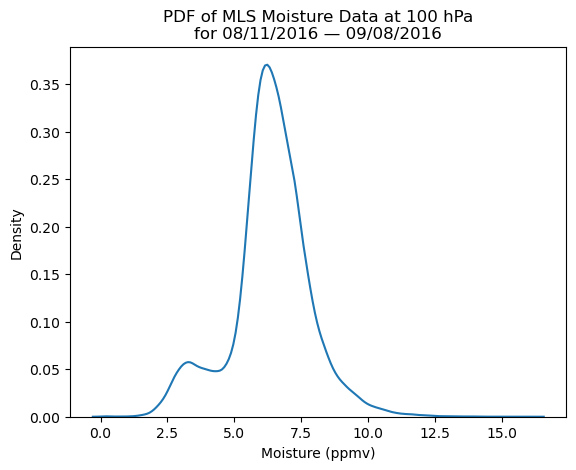

In [ ]:
# Moisture at 100 hPA PDF (MLS)
CreatePDF(MLS_h2o100_hrly_flat)

# TODO: Moisture at 100 hPA PDF (UM)
# CreatePDF(UM_h2o100_hrly_flat)